# corrections for EM data
## GPGN438: Geophysical Senior Design 
### author: Mia Jungman

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import BoundaryNorm

In [2]:
#import datasets
quad_raw = pd.read_csv('conductivity.csv')
inphase_raw = pd.read_csv('inphase.csv')
half_coil = pd.read_csv('woodland_park_0.5.csv')

quad_raw


Reading  seconds_from_UTC_00:00:00]    Lon[deg]   Lat[deg]  \
0            1                   72998.014 -105.076026  39.018209   
1            2                   72998.178 -105.076026  39.018208   
2            3                   72998.329 -105.076026  39.018208   
3            4                   72998.507 -105.076025  39.018207   
4            5                   72998.671 -105.076025  39.018207   
...        ...                         ...         ...        ...   
17721    17722                   80289.062 -105.075836  39.017807   
17722    17723                   80289.265 -105.075837  39.017806   
17723    17724                   80289.453 -105.075839  39.017804   
17724    17725                   80289.640 -105.075840  39.017803   
17725    17726                   80289.812 -105.075841  39.017801   

       Elevation[m]  CV-1.0m  
0          2512.794    6.367  
1          2512.729    5.703  
2          2512.669    5.742  
3          2512.597    6.367  
4          2512.531    5.586  
...             ...      ...  
17721      2501.988   -8.167  
17722      2501.947   -6.019  
17723      2501.909   -6.605  
17724      2501.872   -8.167  
17725      2501.838   -8.948  

[17726 rows x 6 columns]

In [3]:
df = pd.DataFrame({
    'time': quad_raw['seconds_from_UTC_00:00:00]'],
    'lon': half_coil['Lon[deg]'],
    'lat': half_coil['Lat[deg]'],
    'CV-1.0m': quad_raw['CV-1.0m'],
    'IV-1.0m': inphase_raw['IV-1.0m'],
    'CV-0.5m': half_coil['CV-0.5m'],
    'IV-0.5m': half_coil['IV-0.5m']
})

df

time         lon        lat  CV-1.0m  IV-1.0m  CV-0.5m  IV-0.5m
0      72998.014 -105.076026  39.018209    6.367   -0.330  -13.242   -0.820
1      72998.178 -105.076026  39.018208    5.703   -0.316  -14.297   -0.841
2      72998.329 -105.076026  39.018208    5.742   -0.325  -14.961   -0.848
3      72998.507 -105.076025  39.018207    6.367   -0.314  -16.055   -0.840
4      72998.671 -105.076025  39.018207    5.586   -0.305  -16.250   -0.832
...          ...         ...        ...      ...      ...      ...      ...
17721  80289.062 -105.075836  39.017807   -8.167    0.434  -14.287   -0.061
17722  80289.265 -105.075837  39.017806   -6.019    0.366   -4.483   -0.141
17723  80289.453 -105.075839  39.017804   -6.605    0.306   -4.522   -0.188
17724  80289.640 -105.075840  39.017803   -8.167    0.338   -6.358   -0.125
17725  80289.812 -105.075841  39.017801   -8.948    0.400   -6.358   -0.049

[17726 rows x 7 columns]

# visualize raw data

Text(0.5, 1.0, 'In 0.5m')

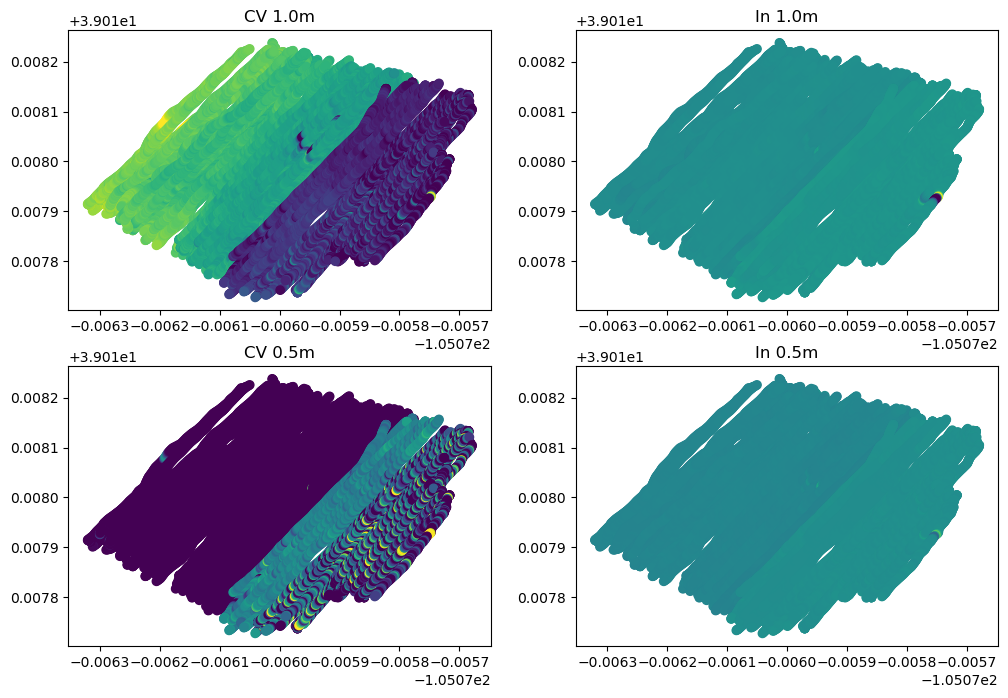

In [4]:
X = df['lon']
Y = df['lat']
Z_quad1 = df['CV-1.0m']
Z_in1 = df['IV-1.0m']
Z_quad05 = df['CV-0.5m']
Z_in05 = df['IV-0.5m']
Z_time = df['time']

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12, 8))

ax1.scatter(X, Y, c=Z_quad1, vmin=-10, vmax=10)
ax1.set_title('CV 1.0m')

ax2.scatter(X, Y, c=Z_in1, vmin=-10, vmax=10)
ax2.set_title('In 1.0m')

ax3.scatter(X, Y, c=Z_quad05, vmin=-10, vmax=10)
ax3.set_title('CV 0.5m')

ax4.scatter(X, Y, c=Z_in05, vmin=-10, vmax=10)
ax4.set_title('In 0.5m')

# dealing with heading errors

### step 1: seperate into lines

In [5]:
line_ranges = [
    (0, 184),    # Line 1
    (185, 358),  # Line 2
    (359, 553),  # Line 3
    (554, 733),  # Line 4
    (734, 923),  # Line 5
    (924, 1112), # Line 6
    (1113, 1302), # Line 7
    (1303, 1502), # Line 8
    (1503, 1713), # Line 9
    (1714, 1934), # Line 10
    (1935, 2149), # Line 11
    (2150, 2366), # Line 12
    (2367, 2576), # Line 13
    (2577, 2798), # Line 14
    (2799, 3009), # Line 15
    (3010, 3220), # Line 16
    (3221, 3425), # Line 17
    (3246, 3636), # Line 18
    (3637, 3841), # Line 19
    (3842, 4046), # Line 20
    (4047, 4257), # Line 21
    (4258, 4463), # Line 22
    (4464, 4674), # Line 23
    (4465, 4884), # Line 24
    (4885, 5100), # Line 25
    (5101, 5310), # Line 26
    (5311, 5520), # Line 27
    (5521, 5725), # Line 28
    (5726, 5941), # Line 29
    (5942, 6173), # Line 30
    (6174, 6416), # Line 31
    (6417, 6648), # Line 32
    (6649, 6880), # Line 33
    (6881, 7069), # Line 34
    (7070, 7264), # Line 35
    (7265, 7458), # Line 36
    (7459, 7679), # Line 37
    (7480, 7905), # Line 38
    (7906, 8142), # Line 39
    (8143, 8373), # Line 40
    (8374, 8626), # Line 41
    (8627, 8873), # Line 42
    (8874, 9121), # Line 43
    (9122, 9379), # Line 44
    (9380, 9632), # Line 45
    (9633, 9895), # Line 46
    (9896, 10100), # Line 47
    (10101, 10306), # Line 48
    (10307, 10552), # Line 49
    (10553, 10789), # Line 50
    (10790, 11040), # Line 51
    (11041, 11288), # Line 52
    (11289, 11537), # Line 53
    (11538, 11797), # Line 54
    (11798, 12065), # Line 55
    (12066, 12323), # Line 56
    (12324, 12570), # Line 57
    (12571, 12823), # Line 58
    (12824, 13081), # Line 59
    (13082, 13329), # Line 60
    (13330, 13593), # Line 61
    (13594, 13850), # Line 62
    (13851, 14097), # Line 63
    (14098, 14344), # Line 64
    (14345, 14602), # Line 65
    (14603, 14849), # Line 66
    (14850, 15101), # Line 67
    (15102, 15343), # Line 68
    (15344, 15600), # Line 69
    (15601, 15852), # Line 70
    (15853, 16052), # Line 71
    (16053, 16214), # Line 72
    (16215, 16383), # Line 73
    (16384, 16525), # Line 74
    (16526, 16699), # Line 75
    (16700, 16830), # Line 76
    (16831, 16972), # Line 77
    (16973, 17099), # Line 78
    (17100, 17225), # Line 79
    (17226, 17356), # Line 80
    (17357, 17493), # Line 81
    (17494, 17604), # Line 82
    (17605, None), # Line 83
    
 
]

# Initialize the 'LineNumber' column with None or an empty string
df['LineNumber'] = None

# Iterate over the line_ranges and assign line numbers
for line_number, (start_idx, end_idx) in enumerate(line_ranges, start=1):
    df.loc[start_idx:end_idx, 'LineNumber'] = f'Line {line_number}'

# Optional: Convert 'LineNumber' to a categorical type for better performance
df['LineNumber'] = pd.Categorical(df['LineNumber'])

In [6]:
df

time         lon        lat  CV-1.0m  IV-1.0m  CV-0.5m  IV-0.5m  \
0      72998.014 -105.076026  39.018209    6.367   -0.330  -13.242   -0.820   
1      72998.178 -105.076026  39.018208    5.703   -0.316  -14.297   -0.841   
2      72998.329 -105.076026  39.018208    5.742   -0.325  -14.961   -0.848   
3      72998.507 -105.076025  39.018207    6.367   -0.314  -16.055   -0.840   
4      72998.671 -105.076025  39.018207    5.586   -0.305  -16.250   -0.832   
...          ...         ...        ...      ...      ...      ...      ...   
17721  80289.062 -105.075836  39.017807   -8.167    0.434  -14.287   -0.061   
17722  80289.265 -105.075837  39.017806   -6.019    0.366   -4.483   -0.141   
17723  80289.453 -105.075839  39.017804   -6.605    0.306   -4.522   -0.188   
17724  80289.640 -105.075840  39.017803   -8.167    0.338   -6.358   -0.125   
17725  80289.812 -105.075841  39.017801   -8.948    0.400   -6.358   -0.049   

      LineNumber  
0         Line 1  
1         Line 1  
2         Line 1  
3         Line 1  
4         Line 1  
...          ...  
17721    Line 83  
17722    Line 83  
17723    Line 83  
17724    Line 83  
17725    Line 83  

[17726 rows x 8 columns]

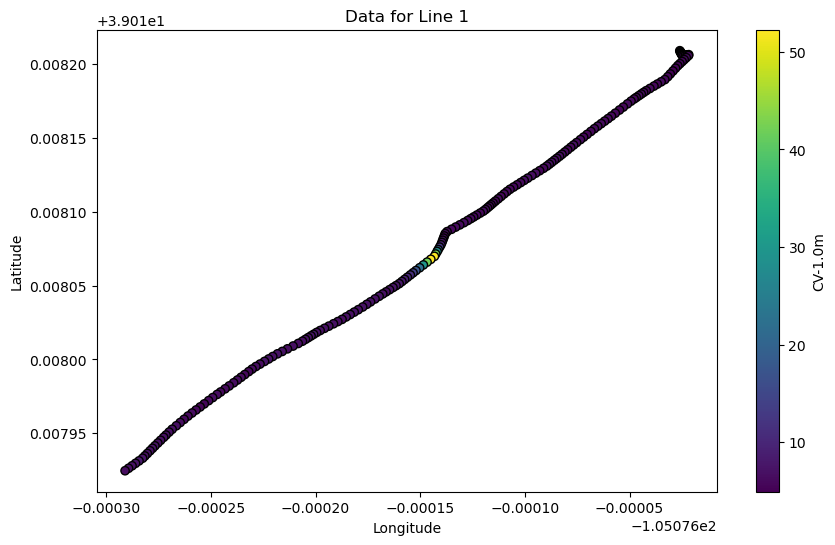

In [7]:
# plot lines
line_number = 'Line 1'
line_data = df[df['LineNumber'] == line_number]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(line_data['lon'], line_data['lat'], c=line_data['CV-1.0m'], cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='CV-1.0m')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Data for {line_number}')
plt.show()

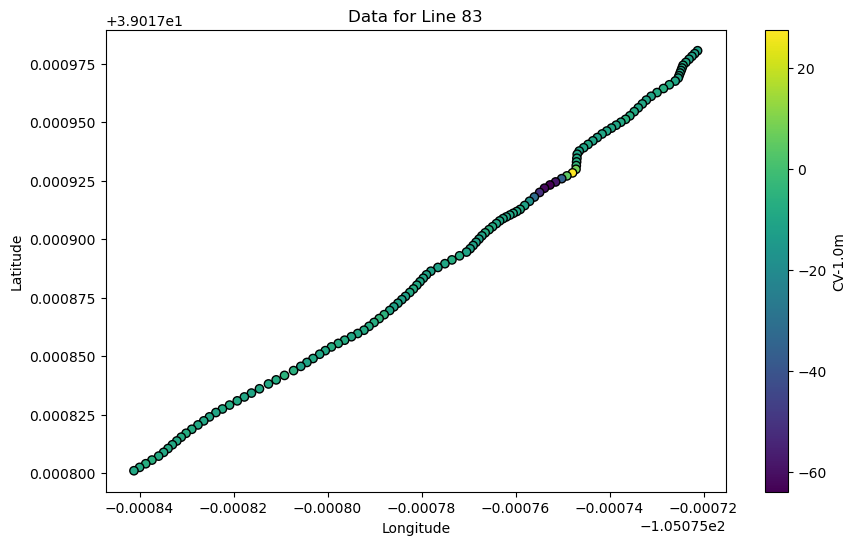

In [8]:
# plot lines
line_number = 'Line 83'
line_data = df[df['LineNumber'] == line_number]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(line_data['lon'], line_data['lat'], c=line_data['CV-1.0m'], cmap='viridis', edgecolor='k')
plt.colorbar(scatter, label='CV-1.0m')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Data for {line_number}')
plt.show()

# Remove heading error measurements in lines

In [9]:
def remove_heading_error(df, measurement_cols, line_col='LineNumber', window_size=7):

    for col in measurement_cols:
        # Apply centered rolling mean within each line
        smoothed_col = f'Smoothed_{col}'
        df[smoothed_col] = df.groupby(line_col)[col].transform(
            lambda x: x.rolling(window=window_size, center=True, min_periods=1).mean()
        )
    
    return df

In [10]:
measurement_cols = ['CV-1.0m', 'IV-1.0m', 'CV-0.5m', 'IV-0.5m']
corr_df = remove_heading_error(df, measurement_cols)

In [11]:
corr_df

time         lon        lat  CV-1.0m  IV-1.0m  CV-0.5m  IV-0.5m  \
0      72998.014 -105.076026  39.018209    6.367   -0.330  -13.242   -0.820   
1      72998.178 -105.076026  39.018208    5.703   -0.316  -14.297   -0.841   
2      72998.329 -105.076026  39.018208    5.742   -0.325  -14.961   -0.848   
3      72998.507 -105.076025  39.018207    6.367   -0.314  -16.055   -0.840   
4      72998.671 -105.076025  39.018207    5.586   -0.305  -16.250   -0.832   
...          ...         ...        ...      ...      ...      ...      ...   
17721  80289.062 -105.075836  39.017807   -8.167    0.434  -14.287   -0.061   
17722  80289.265 -105.075837  39.017806   -6.019    0.366   -4.483   -0.141   
17723  80289.453 -105.075839  39.017804   -6.605    0.306   -4.522   -0.188   
17724  80289.640 -105.075840  39.017803   -8.167    0.338   -6.358   -0.125   
17725  80289.812 -105.075841  39.017801   -8.948    0.400   -6.358   -0.049   

      LineNumber  Smoothed_CV-1.0m  Smoothed_IV-1.0m  Smoothed_CV-0.5m  \
0         Line 1          6.044750         -0.321250        -14.638750   
1         Line 1          5.953000         -0.318000        -14.961000   
2         Line 1          5.885333         -0.314667        -15.071667   
3         Line 1          5.809143         -0.316286        -15.083714   
4         Line 1          5.753429         -0.314714        -15.435286   
...          ...               ...               ...               ...   
17721    Line 83         -8.005429          0.397000        -10.615571   
17722    Line 83         -7.971857          0.390143        -10.492857   
17723    Line 83         -7.848167          0.382167         -9.736667   
17724    Line 83         -7.581200          0.368800         -7.201600   
17725    Line 83         -7.434750          0.352500         -5.430250   

       Smoothed_IV-0.5m  
0             -0.837250  
1             -0.836200  
2             -0.835333  
3             -0.835143  
4             -0.834143  
...                 ...  
17721         -0.085857  
17722         -0.086857  
17723         -0.096000  
17724         -0.112800  
17725         -0.125750  

[17726 rows x 12 columns]

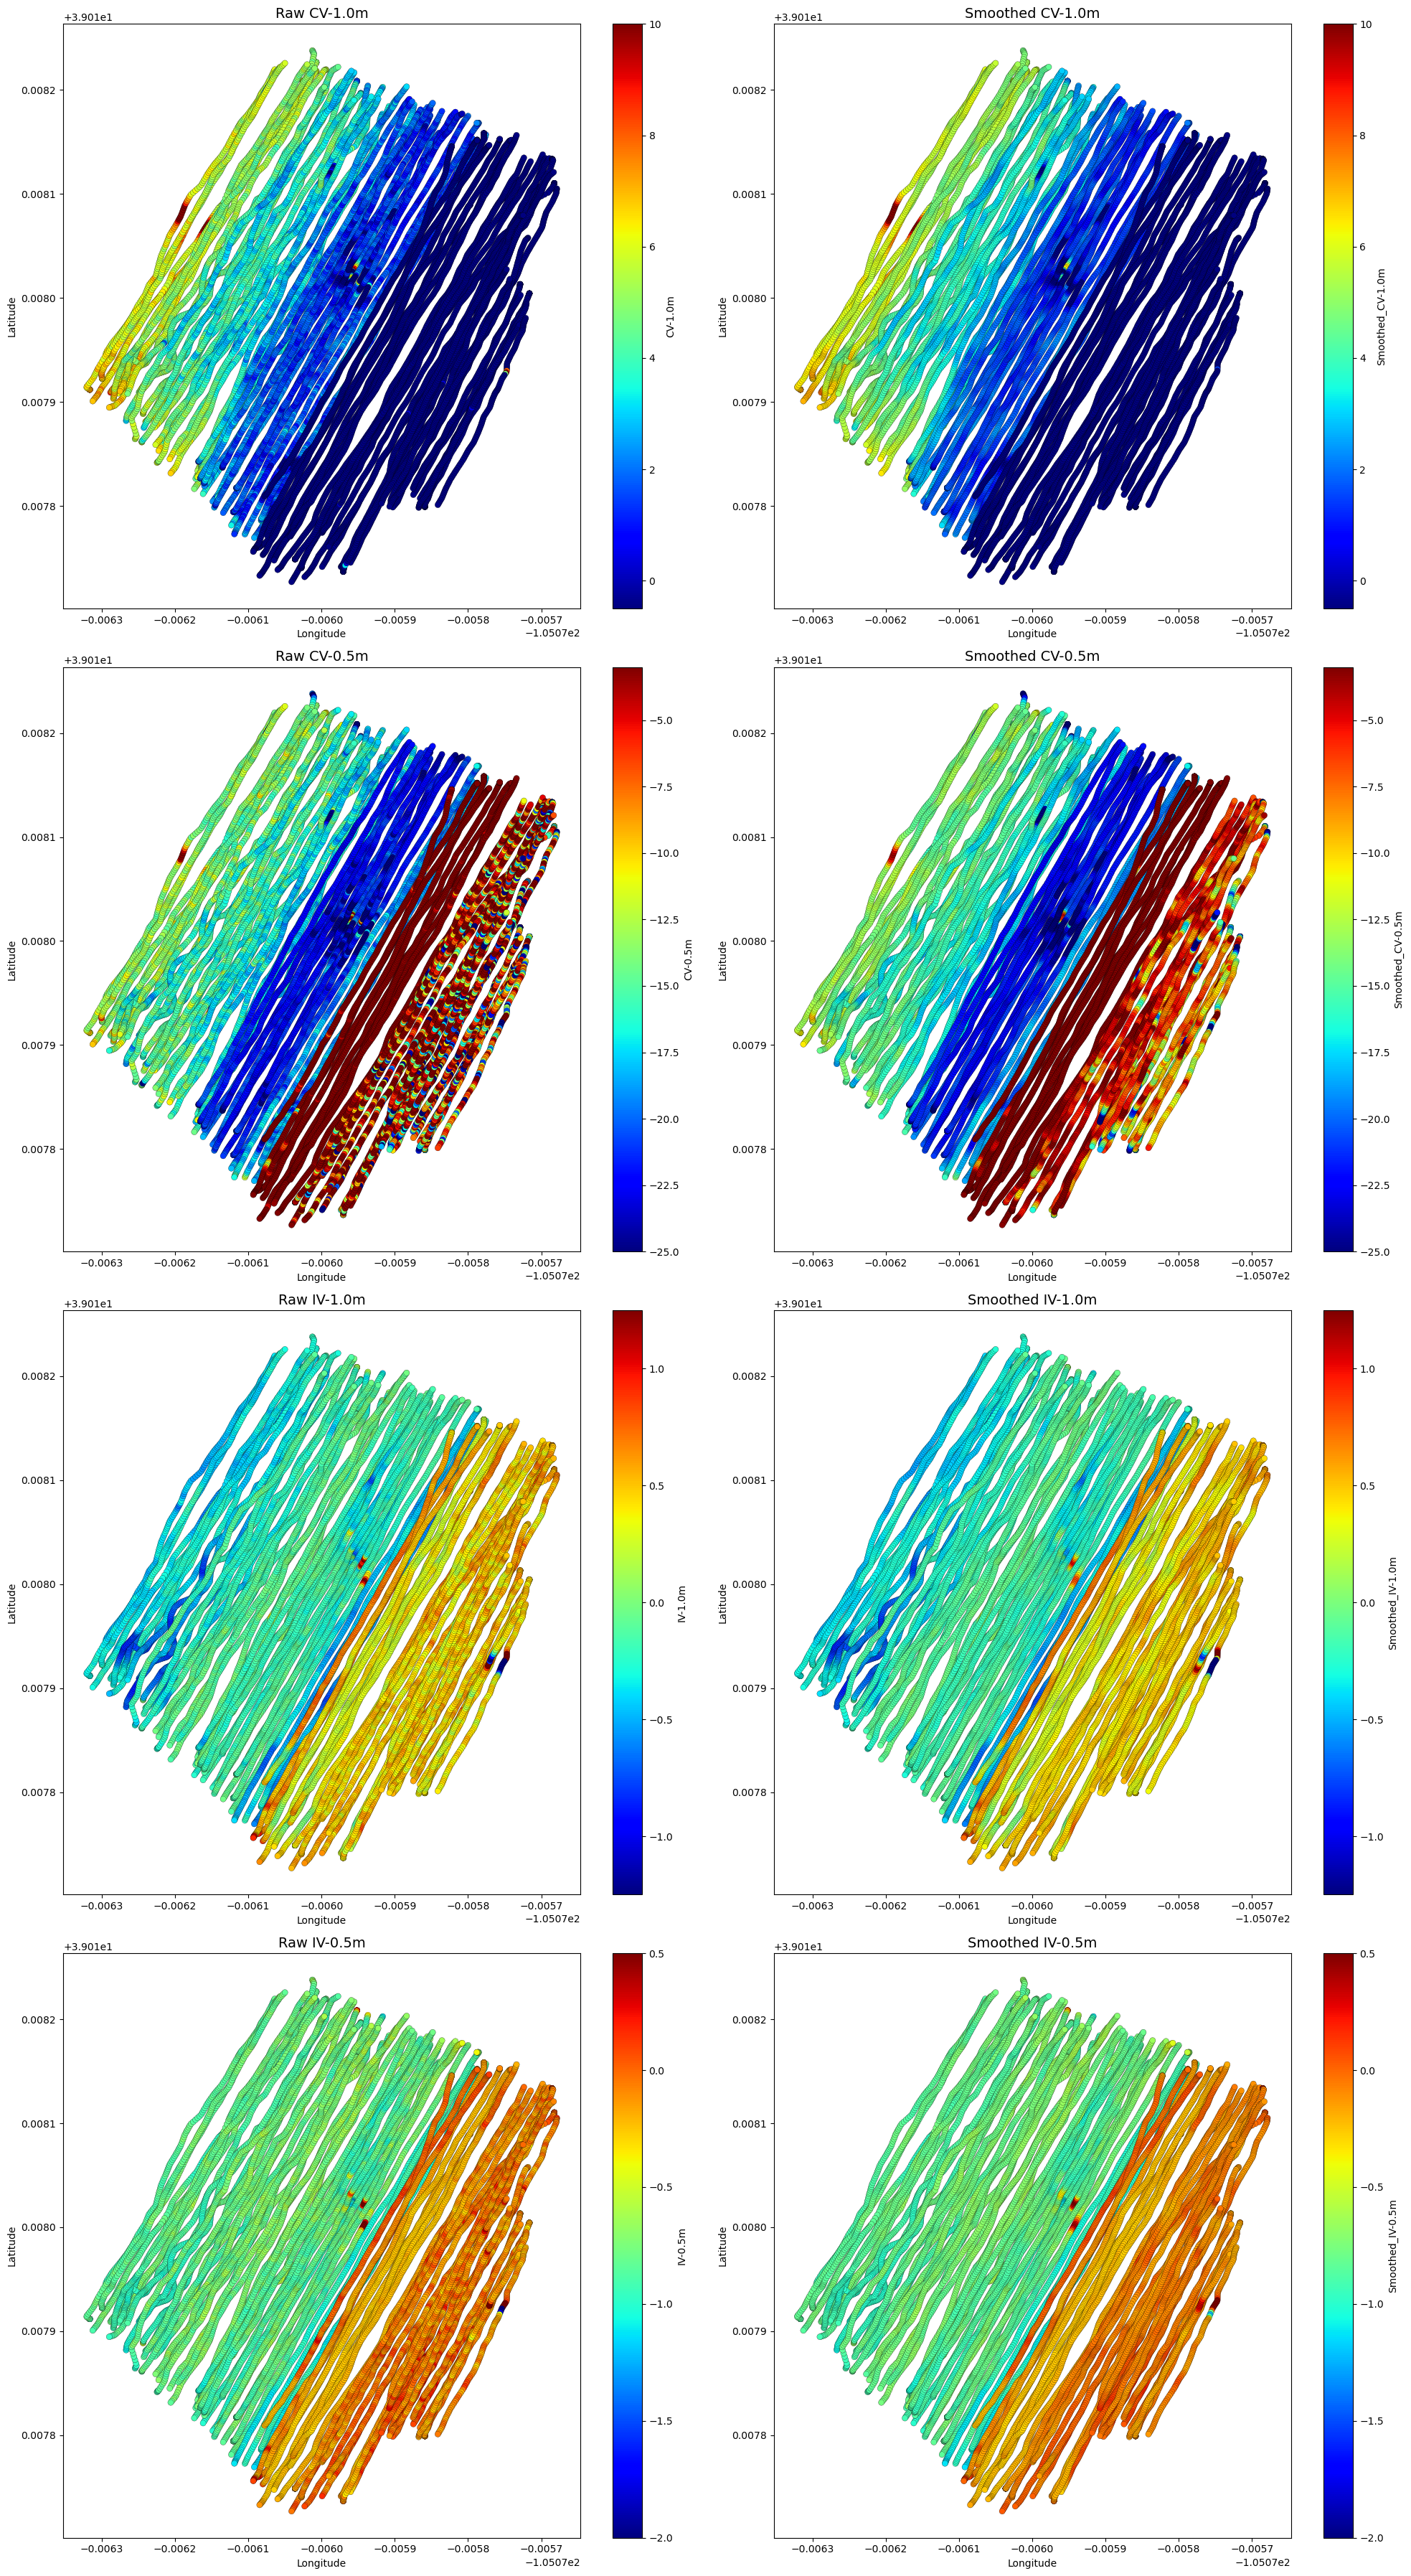

In [12]:
# Define colorbar min/max values for corrected measurements
cmin_max_values = {
    'CV-1.0m': {'vmin': -0.5, 'vmax': 10},
    'CV-0.5m': {'vmin': -25, 'vmax': -3},
    'IV-1.0m': {'vmin': -1.25, 'vmax': 1.25},
    'IV-0.5m': {'vmin': -2, 'vmax': 0.5},
}

# Set up the plot: 4 measurements, raw and smoothed side by side
fig, axes = plt.subplots(4, 2, figsize=(20, 36))  # 4 rows, 2 columns (raw vs smoothed)
measurements = ['CV-1.0m', 'CV-0.5m', 'IV-1.0m', 'IV-0.5m']

for i, measurement in enumerate(measurements):
    vmin = cmin_max_values[measurement]['vmin']
    vmax = cmin_max_values[measurement]['vmax']
    smoothed_col = f"Smoothed_{measurement}"

    # Plot raw scatter
    ax_raw = axes[i, 0]
    sc_raw = ax_raw.scatter(
        corr_df['lon'], corr_df['lat'],
        c=corr_df[measurement], cmap='jet',
        vmin=vmin, vmax=vmax, s=35, edgecolor='k', linewidth=0.2
    )
    ax_raw.set_title(f"Raw {measurement}", fontsize=14)
    ax_raw.set_xlabel('Longitude')
    ax_raw.set_ylabel('Latitude')
    cbar_raw = fig.colorbar(sc_raw, ax=ax_raw)
    cbar_raw.set_label(measurement)

    # Plot smoothed scatter
    ax_smooth = axes[i, 1]
    sc_smooth = ax_smooth.scatter(
        corr_df['lon'], corr_df['lat'],
        c=corr_df[smoothed_col], cmap='jet',
        vmin=vmin, vmax=vmax, s=35, edgecolor='k', linewidth=0.2
    )
    ax_smooth.set_title(f"Smoothed {measurement}", fontsize=14)
    ax_smooth.set_xlabel('Longitude')
    ax_smooth.set_ylabel('Latitude')
    cbar_smooth = fig.colorbar(sc_smooth, ax=ax_smooth)
    cbar_smooth.set_label(smoothed_col)

# Layout adjustment
plt.tight_layout()
plt.show()


# look at time series of 1 measurement to kmow where to adjust for operators

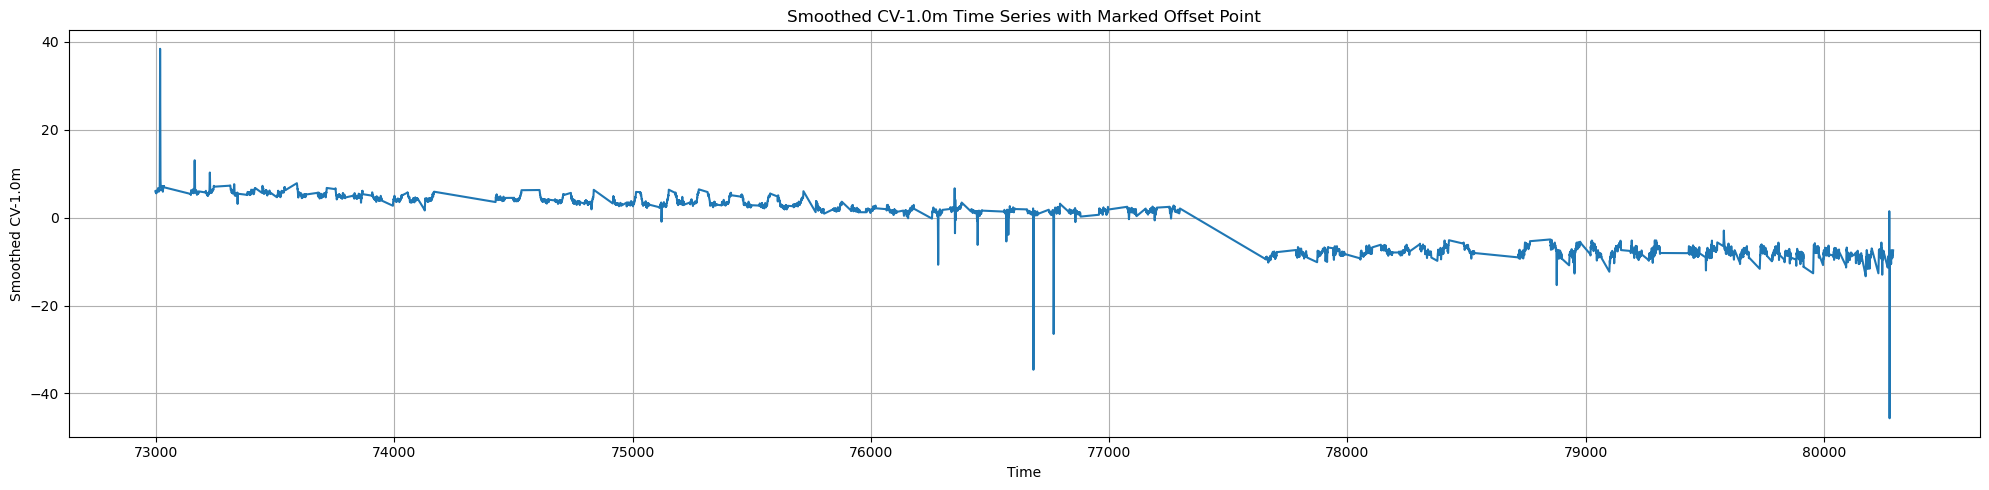

In [13]:
plt.figure(figsize=(20, 5))  # Wider and not too tall
plt.plot(corr_df['time'], corr_df['Smoothed_CV-1.0m'])
plt.xlabel("Time")
plt.ylabel("Smoothed CV-1.0m")
plt.title("Smoothed CV-1.0m Time Series with Marked Offset Point")
plt.grid(True)
plt.tight_layout()
plt.show()


# Adjust the measurements to match up between operators

In [14]:
def correct_offset_progressive(df, time_col, measure_col, window=300, threshold=1.0):
    corrected = df[measure_col].copy()
    ref_mean = corrected.iloc[:window].mean()  # Initial reference mean
    i = window
    last_offset = 0  # Track cumulative offset

    while i < len(df) - window:
        curr_window = corrected.iloc[i:i+window]
        curr_mean = curr_window.mean()

        # Compare current mean to the reference mean
        if abs(curr_mean - ref_mean) > threshold:
            offset = ref_mean - curr_mean
            corrected.iloc[i:] += offset  # Apply correction from here onward
            last_offset += offset
            ref_mean = corrected.iloc[i:i+window].mean()  # Update reference mean
        else:
            ref_mean = (corrected.iloc[i-window:i].mean() + curr_mean) / 2

        i += window

    df[f"{measure_col}_corrected"] = corrected
    return df


In [15]:
def plot_corrected_data(df, time_col, measure_col):
    plt.figure(figsize=(12, 4))
    plt.plot(df[time_col], df[measure_col], label='Original')
    plt.plot(df[time_col], df[f"{measure_col}_corrected"], label='Corrected', linestyle='--')
    plt.xlabel("Time")
    plt.ylabel(measure_col)
    plt.title(f"{measure_col} Time Series with Offset Correction")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


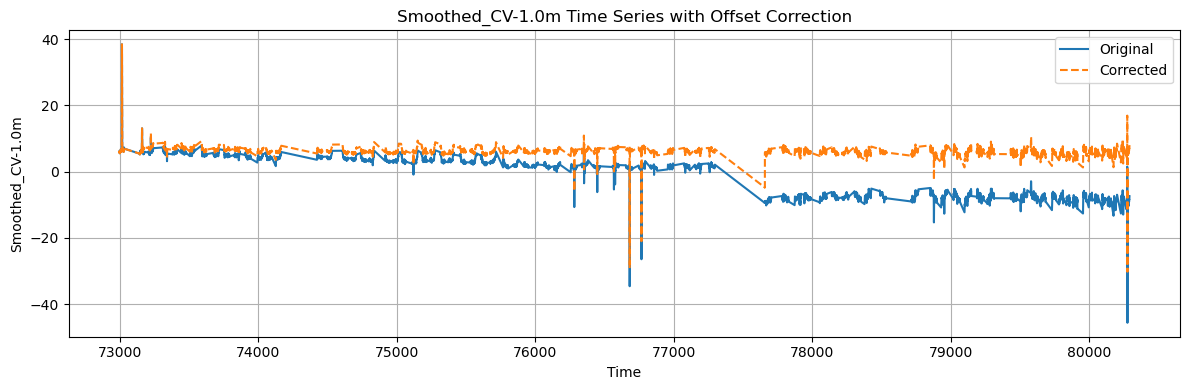

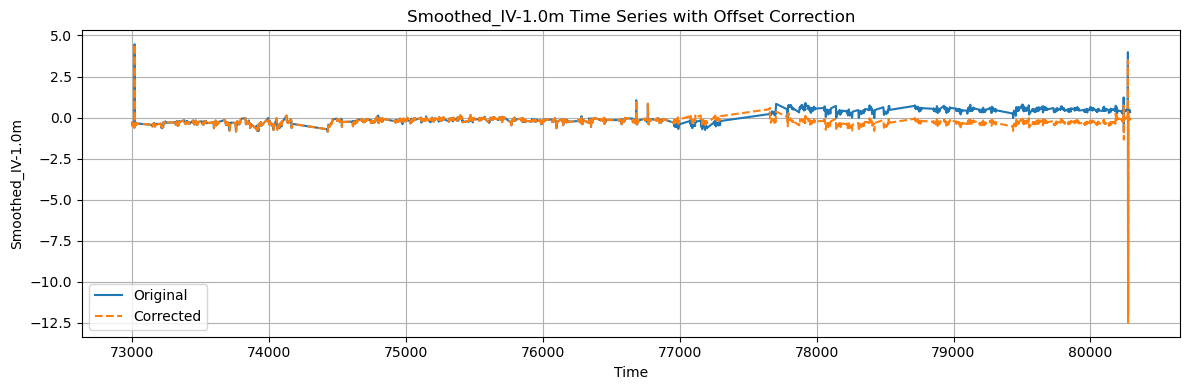

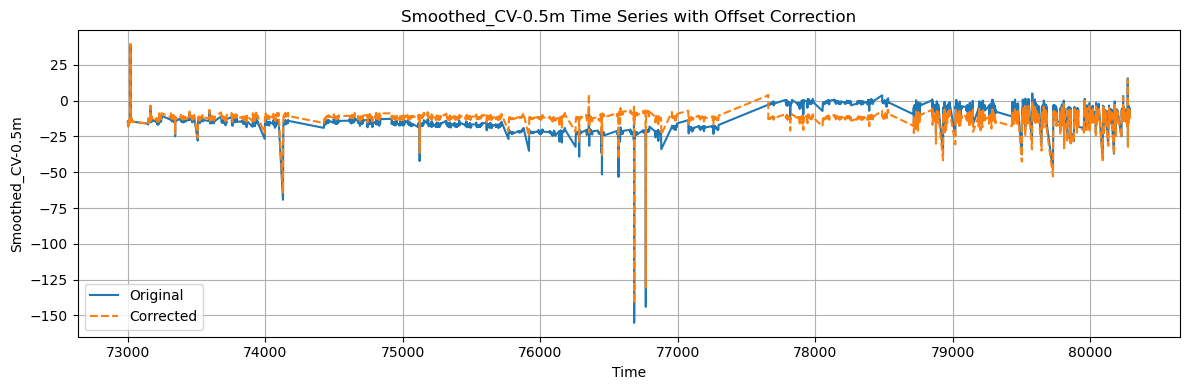

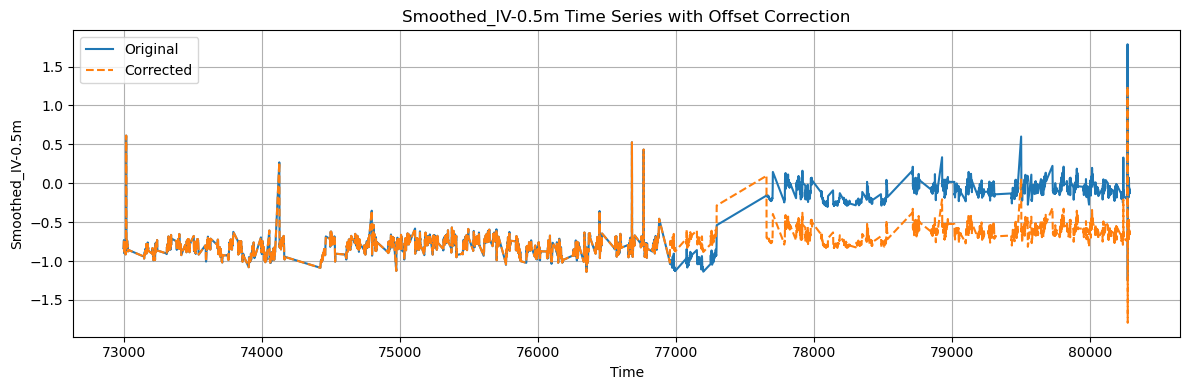

In [16]:
corr_df = correct_offset_progressive(corr_df, 'time', 'Smoothed_CV-1.0m', window=300, threshold=0.5)
plot_corrected_data(corr_df, 'time', 'Smoothed_CV-1.0m')

corr_df = correct_offset_progressive(corr_df, 'time', 'Smoothed_IV-1.0m', window=300, threshold=0.2)
plot_corrected_data(corr_df, 'time', 'Smoothed_IV-1.0m')


corr_df = correct_offset_progressive(corr_df, 'time', 'Smoothed_CV-0.5m', window=300, threshold=0.5)
plot_corrected_data(corr_df, 'time', 'Smoothed_CV-0.5m')


corr_df = correct_offset_progressive(corr_df, 'time', 'Smoothed_IV-0.5m', window=300, threshold=0.2)
plot_corrected_data(corr_df, 'time', 'Smoothed_IV-0.5m')


In [17]:
corr_df

time         lon        lat  CV-1.0m  IV-1.0m  CV-0.5m  IV-0.5m  \
0      72998.014 -105.076026  39.018209    6.367   -0.330  -13.242   -0.820   
1      72998.178 -105.076026  39.018208    5.703   -0.316  -14.297   -0.841   
2      72998.329 -105.076026  39.018208    5.742   -0.325  -14.961   -0.848   
3      72998.507 -105.076025  39.018207    6.367   -0.314  -16.055   -0.840   
4      72998.671 -105.076025  39.018207    5.586   -0.305  -16.250   -0.832   
...          ...         ...        ...      ...      ...      ...      ...   
17721  80289.062 -105.075836  39.017807   -8.167    0.434  -14.287   -0.061   
17722  80289.265 -105.075837  39.017806   -6.019    0.366   -4.483   -0.141   
17723  80289.453 -105.075839  39.017804   -6.605    0.306   -4.522   -0.188   
17724  80289.640 -105.075840  39.017803   -8.167    0.338   -6.358   -0.125   
17725  80289.812 -105.075841  39.017801   -8.948    0.400   -6.358   -0.049   

      LineNumber  Smoothed_CV-1.0m  Smoothed_IV-1.0m  Smoothed_CV-0.5m  \
0         Line 1          6.044750         -0.321250        -14.638750   
1         Line 1          5.953000         -0.318000        -14.961000   
2         Line 1          5.885333         -0.314667        -15.071667   
3         Line 1          5.809143         -0.316286        -15.083714   
4         Line 1          5.753429         -0.314714        -15.435286   
...          ...               ...               ...               ...   
17721    Line 83         -8.005429          0.397000        -10.615571   
17722    Line 83         -7.971857          0.390143        -10.492857   
17723    Line 83         -7.848167          0.382167         -9.736667   
17724    Line 83         -7.581200          0.368800         -7.201600   
17725    Line 83         -7.434750          0.352500         -5.430250   

       Smoothed_IV-0.5m  Smoothed_CV-1.0m_corrected  \
0             -0.837250                    6.044750   
1             -0.836200                    5.953000   
2             -0.835333                    5.885333   
3             -0.835143                    5.809143   
4             -0.834143                    5.753429   
...                 ...                         ...   
17721         -0.085857                    7.411849   
17722         -0.086857                    7.445420   
17723         -0.096000                    7.569110   
17724         -0.112800                    7.836077   
17725         -0.125750                    7.982527   

       Smoothed_IV-1.0m_corrected  Smoothed_CV-0.5m_corrected  \
0                       -0.321250                  -14.638750   
1                       -0.318000                  -14.961000   
2                       -0.314667                  -15.071667   
3                       -0.316286                  -15.083714   
4                       -0.314714                  -15.435286   
...                           ...                         ...   
17721                   -0.090357                  -11.456262   
17722                   -0.097214                  -11.333548   
17723                   -0.105190                  -10.577358   
17724                   -0.118557                   -8.042291   
17725                   -0.134857                   -6.270941   

       Smoothed_IV-0.5m_corrected  
0                       -0.837250  
1                       -0.836200  
2                       -0.835333  
3                       -0.835143  
4                       -0.834143  
...                           ...  
17721                   -0.626565  
17722                   -0.627565  
17723                   -0.636708  
17724                   -0.653508  
17725                   -0.666458  

[17726 rows x 16 columns]

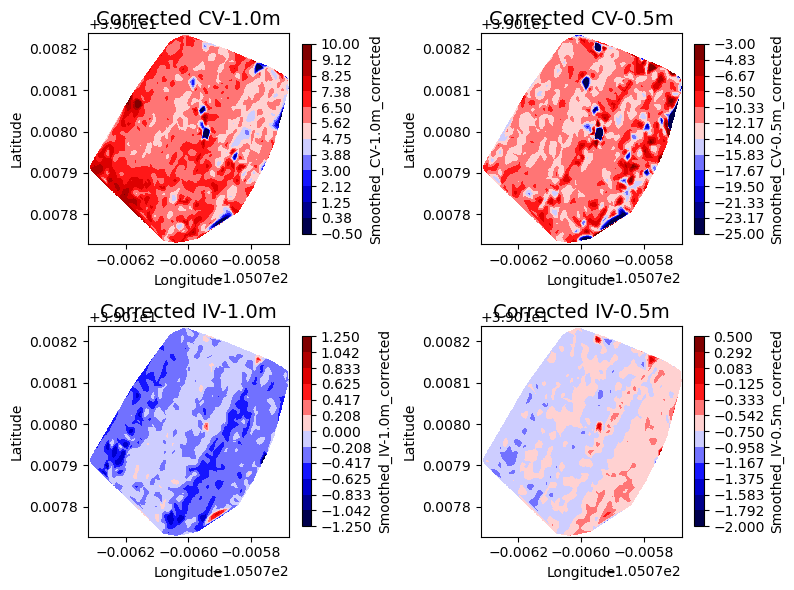

In [18]:
# Define colorbar min/max values per corrected measurement
cmin_max_values = {
    'CV-1.0m': {'vmin': -0.5, 'vmax': 10},
    'CV-0.5m': {'vmin': -25, 'vmax': -3},
    'IV-1.0m': {'vmin': -1.25, 'vmax': 1.25},
    'IV-0.5m': {'vmin': -2, 'vmax': .5},
}

# Create grid
xi = np.linspace(corr_df['lon'].min(), corr_df['lon'].max(), 500)
yi = np.linspace(corr_df['lat'].min(), corr_df['lat'].max(), 500)
xi, yi = np.meshgrid(xi, yi)

# Set up the plot
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()  # Flatten to simplify indexing

# Measurements to loop through
measurements = ['CV-1.0m', 'CV-0.5m', 'IV-1.0m', 'IV-0.5m']

for idx, measurement in enumerate(measurements):
    vmin = cmin_max_values[measurement]['vmin']
    vmax = cmin_max_values[measurement]['vmax']
    levels = np.linspace(vmin, vmax, 13)
    norm = BoundaryNorm(boundaries=levels, ncolors=256)

    col = f"Smoothed_{measurement}_corrected"

    # Interpolate
    zi = griddata(
        (corr_df['lon'], corr_df['lat']),
        corr_df[col],
        (xi, yi),
        method='cubic'
    )

    ax = axes[idx]
    im = ax.imshow(
        zi,
        extent=(corr_df['lon'].min(), corr_df['lon'].max(),
                corr_df['lat'].min(), corr_df['lat'].max()),
        origin='lower',
        cmap='seismic',
        norm=norm,
        aspect='auto'
    )

    ax.set_title(f"Corrected {measurement}", fontsize=14)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    cbar = fig.colorbar(im, ax=ax, ticks=levels, shrink=0.9)
    cbar.set_label(col)

plt.tight_layout()
plt.show()


In [19]:
corr_df.to_csv('processed_EM.csv', index=False)

# Convert field notes into dataframe, locations of gravestones

In [20]:
# Data: labels and (latitude, longitude) pairs
data = {
    'Label': [
        'Grave 1',
        'Grave 2',
        'Post 1 (E)',
        'Post 2 (NE)',
        'Post 3 (SE)',
        'Base Station'
    ],
    'Latitude': [
        39.018064,
        39.017991,
        39.018048,
        39.018063,
        39.017975,
        39.018181
    ],
    'Longitude': [
        -105.076007,
        -105.075881,
        -105.075841,
        -105.075819,
        -105.075805,
        -105.076151
    ]
}

# Create DataFrame
markings_df = pd.DataFrame(data)

# Display
print(markings_df)


          Label   Latitude   Longitude
0       Grave 1  39.018064 -105.076007
1       Grave 2  39.017991 -105.075881
2    Post 1 (E)  39.018048 -105.075841
3   Post 2 (NE)  39.018063 -105.075819
4   Post 3 (SE)  39.017975 -105.075805
5  Base Station  39.018181 -105.076151


# Add markers onto maps

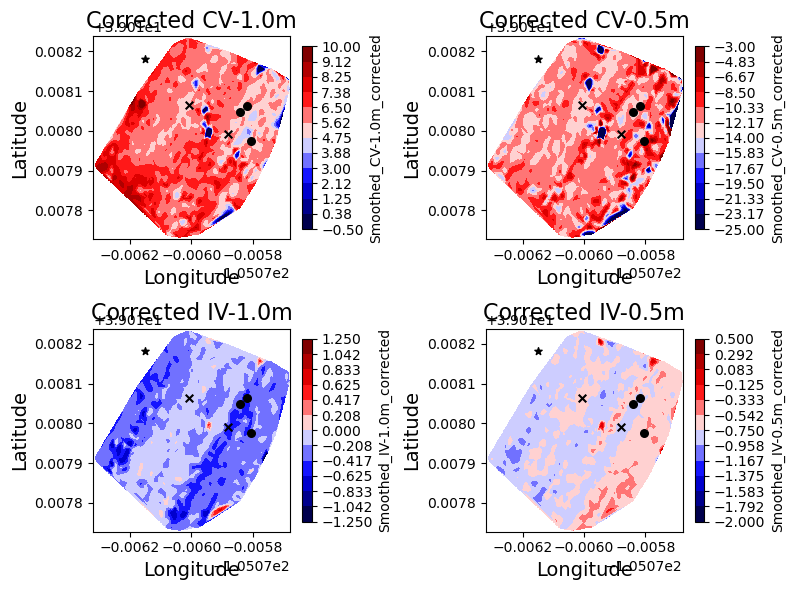

In [21]:
# Define colorbar min/max values per corrected measurement

# Create grid
xi = np.linspace(corr_df['lon'].min(), corr_df['lon'].max(), 500)
yi = np.linspace(corr_df['lat'].min(), corr_df['lat'].max(), 500)
xi, yi = np.meshgrid(xi, yi)

# Categorize markings
graves = markings_df[markings_df['Label'].str.contains("Grave", case=False)]
posts = markings_df[markings_df['Label'].str.contains("Post", case=False)]
base = markings_df[markings_df['Label'].str.contains("Base", case=False)]

# Set up the plot
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

# Measurements to loop through
measurements = ['CV-1.0m', 'CV-0.5m', 'IV-1.0m', 'IV-0.5m']

for idx, measurement in enumerate(measurements):
    vmin = cmin_max_values[measurement]['vmin']
    vmax = cmin_max_values[measurement]['vmax']
    levels = np.linspace(vmin, vmax, 13)
    norm = BoundaryNorm(boundaries=levels, ncolors=256)

    col = f"Smoothed_{measurement}_corrected"

    # Interpolate
    zi = griddata(
        (corr_df['lon'], corr_df['lat']),
        corr_df[col],
        (xi, yi),
        method='cubic'
    )

    ax = axes[idx]
    im = ax.imshow(
        zi,
        extent=(corr_df['lon'].min(), corr_df['lon'].max(),
                corr_df['lat'].min(), corr_df['lat'].max()),
        origin='lower',
        cmap='seismic',
        norm=norm,
        aspect='auto'
    )

    ax.scatter(graves['Longitude'], graves['Latitude'], color='black', s=30, marker='x', label='Grave')
    ax.scatter(posts['Longitude'], posts['Latitude'], color='black', s=30, marker='o', label='Post')
    ax.scatter(base['Longitude'], base['Latitude'], color='black', s=30, marker='*', label='Base Station')

    ax.set_title(f"Corrected {measurement}", fontsize=16)
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)

    # Add colorbar
    cbar = fig.colorbar(im, ax=ax, ticks=levels, shrink=0.9)
    cbar.set_label(col)

plt.tight_layout()
plt.show()
